In [1]:
! pip install geopandas --quiet
! pip install contextily --quiet

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [9]:
import geopandas as gpd
import pandas as pd
import fiona
import os
import matplotlib.pyplot as plt
import folium

from folium.plugins import MarkerCluster, HeatMap, BeautifyIcon
from folium.map import LayerControl, Layer, FeatureGroup
import seaborn as sns
from shapely.geometry import Point, LineString, MultiPoint

In [3]:
garbage_routes = gpd.read_file("/work/world_data_league_2022/stage_one/data_1/Garbage Routes/geo_export_9c44eebc-b8fe-4506-8d25-5a46162bfb64.shp")
garbage_routes 

,garb_day,garb_rt,garb_sup,landfill,op_type,rt_old,super_num,geometry
0,Thursday,PAH83,Gilbert,TDS,Auto,None,697,"POLYGON ((-97.70618 30.36742, -97.70723 30.367..."
1,Monday,PAM54,Castillo,TDS,Auto,PAM84,500,"POLYGON ((-97.83237 30.16213, -97.83237 30.162..."
2,Monday,PAM71,Carnline,TDS,Auto,None,596,"POLYGON ((-97.72977 30.19009, -97.72103 30.186..."
3,Thursday,PAH54,Castillo,TDS,Auto,PAH75,500,"POLYGON ((-97.65374 30.26269, -97.65322 30.282..."
4,Wednesday,PAW71,Carnline,TDS,Auto,None,596,"POLYGON ((-97.64683 30.38640, -97.64724 30.386..."
...,...,...,...,...,...,...,...,...
179,Wednesday,PAW63,Litson,TDS,Auto,None,170,"POLYGON ((-97.77238 30.42130, -97.77238 30.421..."
180,Monday,PAM72,Carnline,TDS,Auto,None,596,"MULTIPOLYGON (((-97.77343 30.14455, -97.77252 ..."
181,Monday,PAM73,Carnline,TDS,Auto,NO ROUTE,596,"POLYGON ((-97.77932 30.15112, -97.77839 30.151..."
182,Tuesday,PAT84,Gilbert,TDS,Auto,PAT71,697,"POLYGON ((-97.79986 30.24749, -97.79170 30.237..."


In [5]:
garbage_routes.shape, garbage_routes.dtypes

((184, 8),
 garb_day       object
 garb_rt        object
 garb_sup       object
 landfill       object
 op_type        object
 rt_old         object
 super_num      object
 geometry     geometry
 dtype: object)

In [7]:
for col in garbage_routes.columns:
    print(col, garbage_routes[col].nunique() ,garbage_routes[col].unique())
    print("-------------------")

garb_day 5 ['Thursday' 'Monday' 'Wednesday' 'Tuesday' 'Friday']
-------------------
garb_rt 184 ['PAH83' 'PAM54' 'PAM71' 'PAH54' 'PAW71' 'PH21' 'PAM80' 'PAT71' 'PAM01'
 'PAM02' 'PM41' 'PAM03' 'PAM63' 'PAM05' 'PAM64' 'PAM65' 'PAT82' 'PAM60'
 'PAM04' 'PAM61' 'PAM62' 'PAM81' 'PAM85' 'PAM84' 'PAM82' 'PAM83' 'PAM52'
 'PM10' 'PAM51' 'PAM53' 'PM11' 'PM42' 'PM30' 'PAT52' 'PAM74' 'PM40' 'PM31'
 'PM32' 'PM22' 'PM12' 'PM21' 'PAT01' 'PAT02' 'PAT03' 'PAT04' 'PAT80'
 'PAT60' 'PAT61' 'PAT62' 'PAT63' 'PAT83' 'PAT51' 'PAT50' 'PAT53' 'PAT73'
 'PAT74' 'PAT72' 'PAM70' 'PT11' 'PT30' 'PAW73' 'PH41' 'PT10' 'PH10' 'PT20'
 'PT21' 'PF33' 'PF13' 'PAF72' 'PF32' 'PAF83' 'PAF80' 'PAF54' 'PF22'
 'PAF81' 'PAF71' 'PAH53' 'PF40' 'PAF73' 'PAF82' 'PAF02' 'PAF03' 'PAF50'
 'PAF70' 'PAH50' 'PF20' 'PF10' 'PAF63' 'PAF52' 'PAF53' 'PF11' 'PF21'
 'PAF62' 'PAH51' 'PF41' 'PAF61' 'PF30' 'PH30' 'PH32' 'PAH72' 'PH20'
 'PAH74' 'PAH71' 'PAH70' 'PAH01' 'PAH02' 'PAH64' 'PAH03' 'PAH04' 'PAH81'
 'PAH05' 'PAH06' 'PAH63' 'PAH80' 'PAH62' 'PAH

In [ ]:
For now lets focus on the columns: garb_rt and geometry

<AxesSubplot:>

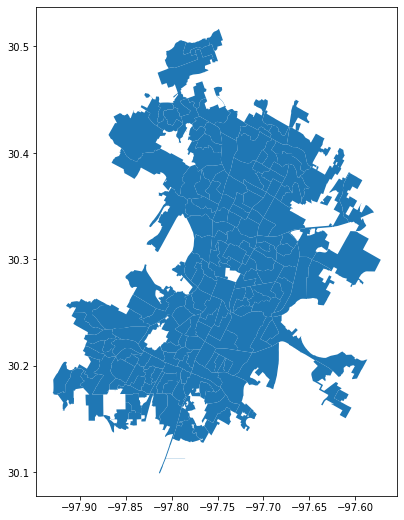

In [13]:
df_path = garbage_routes[['garb_rt', 'geometry', 'garb_day' ]]
fig = plt.figure(figsize = (16,9))
ax = plt.subplot()
df_path.plot(ax = ax)


In [20]:
df = pd.read_csv("/work/world_data_league_2022/stage_one/data/waste_data.csv")
df.head(2)

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,BU13,899097
1,12/08/2020,RECYCLING - SINGLE STREAM,12/08/2020 10:00:00 AM,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,899078


In [22]:
len(set(df['Route Number'].unique()).difference(garbage_routes['garb_rt'].unique()))

2037

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a1cabe9-69f7-4a67-be18-e232e1feb2b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>